## About the dataset


As a medical researcher compiling data for a study. I have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of my job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and I need to use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
path="C:/Users/micho/OneDrive/Desktop/DATABASE/GITHUB/DATASET/drug200.csv"

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [10]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [11]:
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [12]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [13]:
df['Sex']= df.Sex.astype('category').cat.codes
df[:2]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,drugY
1,47,1,LOW,HIGH,13.093,drugC


In [14]:
label_encoder = LabelEncoder()
df['BP']= label_encoder.fit_transform(df['BP'])


In [15]:
df['Cholesterol']= label_encoder.fit_transform(df['Cholesterol'])
df[:3]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC


Preprocessing

X as the Feature Matrix (data of my_data)
y as the response vector (target)

In [16]:
X, y= df.iloc[:, :-1].values, df.iloc[:,-1]


It is not necessary to apply scaling or normalization when using a Decision Tree classifier. Decision Trees are inherently insensitive to the scale of the features. This means that they do not require features to be normalized or standardized for the model to perform well.
Therefore, I can go ahead with splitting the dataset into both training and testing datasets respectively.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [19]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (140, 5) &  Size of Y training set (140,)


Modeling


I will first create an instance of the DecisionTreeClassifier called drugTree.
Inside of the classifier, I will specify criterion="entropy" so I can see the information gain of each node.

Next, I will fit the data with the training feature matrix X_trainset and training response vector y_trainset



In [20]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [21]:
drugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Making predictions with the built model with train dataset

In [22]:
X_test_pred = drugTree.predict(X_testset)
X_test_pred

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugX'], dtype=object)

In [23]:
Xtrainset_pred = drugTree.predict(X_trainset)

### Evaluation with accuracy score

Next, let's import metrics from sklearn and check the accuracy of our model.


In [24]:
from sklearn.metrics import accuracy_score


In [25]:
print("DecisionTrees's Accuracy: ", accuracy_score(y_testset, X_test_pred))

DecisionTrees's Accuracy:  0.9833333333333333


98% Accuracy (Out of sample accuracy)


Accuracy score usually compares the true labels (y_trainset) from the training dataset against the predicted labels.

In [26]:
print("DecisionTrees's Accuracy: ", accuracy_score(y_trainset, Xtrainset_pred))

DecisionTrees's Accuracy:  1.0


The model score 100% accuracy score on the training dataset. An overfitting case here

### Evaluation with confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
cm = confusion_matrix(y_testset, X_test_pred)

In [29]:
cm

array([[ 7,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 20,  1],
       [ 0,  0,  0,  0, 22]])

In [30]:
y.value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

This confusion matrix indicates that the model is very effective, with only one misclassification out of 60 instances. The misclassification occurred between Classes 3 and 4, which may suggest a slight overlap or confusion between these two classes, but overall, the model's performance is excellent.

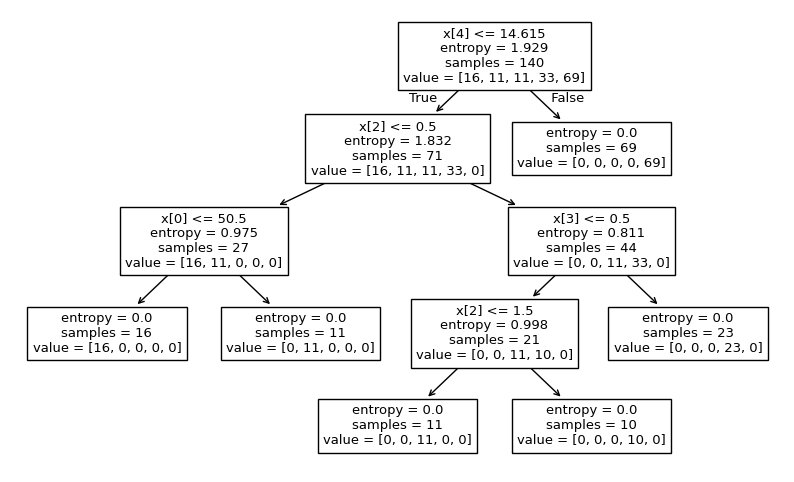

In [31]:
plt.figure(figsize=(10,6))
tree.plot_tree(drugTree)
plt.show()

## Author

[Jolayemi S Babatunde](linkedin.com/in/babatunde-jolayemi-a05312275)